Khai báo các thư viện cần thiết

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

Đọc dữ liệu

In [2]:
main_df = pd.read_csv('D:/Code/python/mat3533/practice06/data/sonar.all-data.csv',header=None)
main_df

0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      51      52      53      54      55      56      57  \
0    0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1    0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2    0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3    0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4    0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
203  0.2684  ...  0.0116  0.0098  0.0199  0.0033  0.0101  0.0065  0.0115   
204  0.2154  ...  0.0061  0.0093  0.0135  0.0063  0.0063  0.0034  0.0032   
205  0.2529  ...  0.0160  0.0029  0.0051  0.0062  0.0089  0.0140  0.0138   
206  0.2354  ...  0.0086  0.0046  0.0126  0.0036  0.0035  0.0034  0.0079   
207  0.2354  ...  0.0146  0.0129  0.0047  0.0039  0.0061  0.0040  0.0036   

         58      59  60  
0    0.0090  0.0032   R  
1    0.0052  0.0044   R  
2    0.0095  0.0078   R  
3    0.0040  0.0117   R  
4    0.0107  0.0094   R  
..      ...     ...  ..  
203  0.0193  0.0157   M  
204  0.0062  0.0067   M  
205  0.0077  0.0031   M  
206  0.0036  0.0048   M  
207  0.0061  0.0115   M  

[208 rows x 61 columns]

Đổi nhãn của đầu ra y từ {‘M’, ‘R’} sang {1, -1} (tức là M ứng với class 1;
R ứng với class -1)

In [3]:
y_df = main_df[60]
targes_label = {'M': 1,'R': -1}
targes_df = [targes_label[item] for item in y_df]
print(targes_df)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Lấy dữ liệu quan sát(bỏ cột 60)

In [4]:
inputs_df = main_df.drop(60, axis=1)

Bổ sung thêm trường dữ liệu x0 = 1 vào bên trái

In [5]:
inputs_df = main_df.drop(60, axis=1)
x0 = np.ones(( inputs_df.shape[0], 1))
X = np.concatenate((x0, inputs_df), axis = 1)

Chuẩn hóa dữ liệu 

In [6]:
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

Giảm số chiều dữ liệu về 2 chiều

In [8]:
pca_02 = PCA(n_components=2)
X_pca_02 = pca_02.fit_transform(X_standard)

Hiển thị dữ liệu đã giảm số chiều

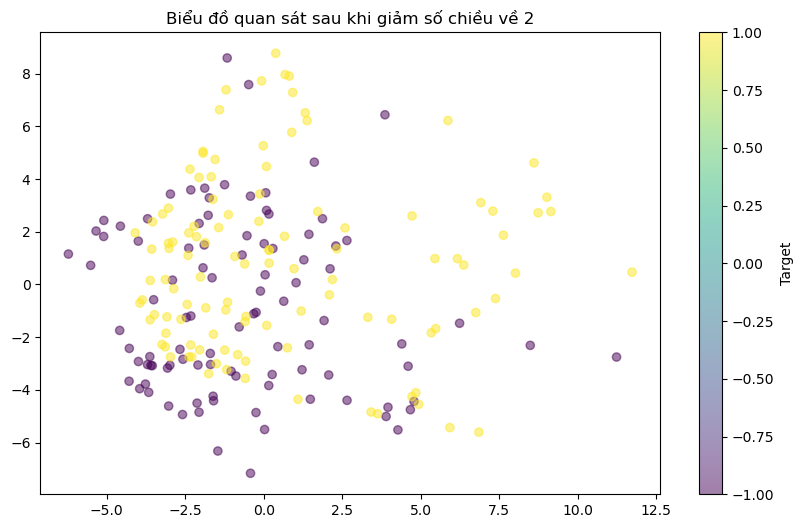

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_02[:, 0], X_pca_02[:, 1], c=targes_df, cmap='viridis', alpha=0.5)
plt.title('Biểu đồ quan sát sau khi giảm số chiều về 2')
plt.colorbar(label='Target')
plt.show()

Chia dữ liệu theo tỉ lệ train:test = 7:3

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_02, targes_df, test_size=0.30,
random_state=42)

Chạy mô hình Logistic Regression và tính độ chính xác

In [11]:
model_log_reg = LogisticRegression()
model_log_reg.fit(X_train, y_train)

y_pred_log_reg = model_log_reg.predict(X_test)
print(f"Prediction:\n {y_pred_log_reg}")

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)

print("Accuracy: ", accuracy_log_reg)
print("Precision: ", precision_log_reg)
print("Recall: ", recall_log_reg)

Prediction:
 [-1  1 -1 -1 -1 -1  1  1 -1  1  1 -1  1  1  1 -1  1 -1  1 -1  1 -1  1  1
 -1 -1 -1  1  1  1  1 -1 -1 -1  1  1  1 -1  1  1 -1 -1  1 -1 -1  1 -1 -1
 -1 -1 -1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1]
Accuracy:  0.6507936507936508
Precision:  0.7096774193548387
Recall:  0.6285714285714286
